In [344]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def eksplisitt(u, alpha=0.25, h=0, n=1000):
    for i in range(n):
        u[1:-1, 1:-1]+=alpha*(u[:-2, 1:-1]+
                          u[2:, 1:-1]+
                          u[1:-1, :-2]+
                          u[1:-1, 2:]-
                          4*u[1:-1, 1:-1])
        u[0] = u[-1]
    return u

def toRGB(image): #open CV laster bilder i BGR. Konverterer til RGB
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #returnerer bildet konvertert til RGB

def anon(ROI):
    im = ROI
    im = im.astype(dtype=float)
    im = eksplisitt(im, n = 150)     #løs
    return im
    
def detectFace(file, title, scaleFactor = 1.5, minNeighbors = 5):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters + some explanation
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file) #leser inn bildet
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #importerer haarscade biblioteket
    
    faces = face_cascade.detectMultiScale(image, scaleFactor, minNeighbors)
    
    for (x,y,w,h) in faces:
        ROI = image[y:y+h ,x:x+w]                       #Region of Interest --> ansiktet                                              #blurrer området som er definert som ansikt
        blur = anon(ROI)                                #Anonymiserer ROI
        image[y:y+h ,x:x+w] = blur
    
    print("Antall ansikt er", len(faces))               #teller opp antall ansikt funnet og skriver de ut
    
    #iv.singleView(ROI,title)
        
    iv.singleView(toRGB(image),title)                   #displayer bildet

Antall ansikt er 1


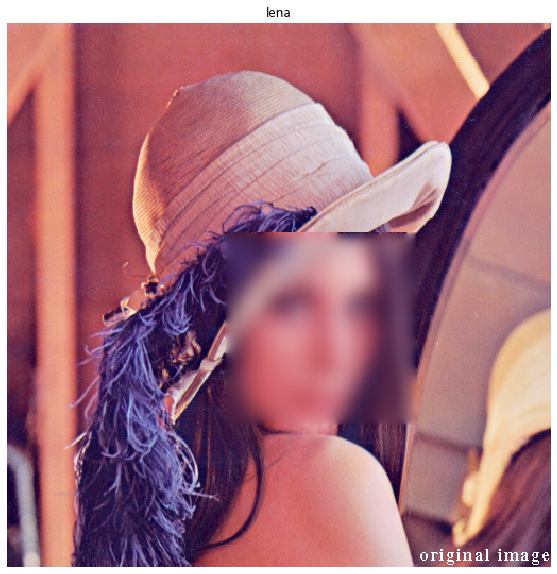

In [345]:
detectFace(lena, "lena")

Antall ansikt er 5


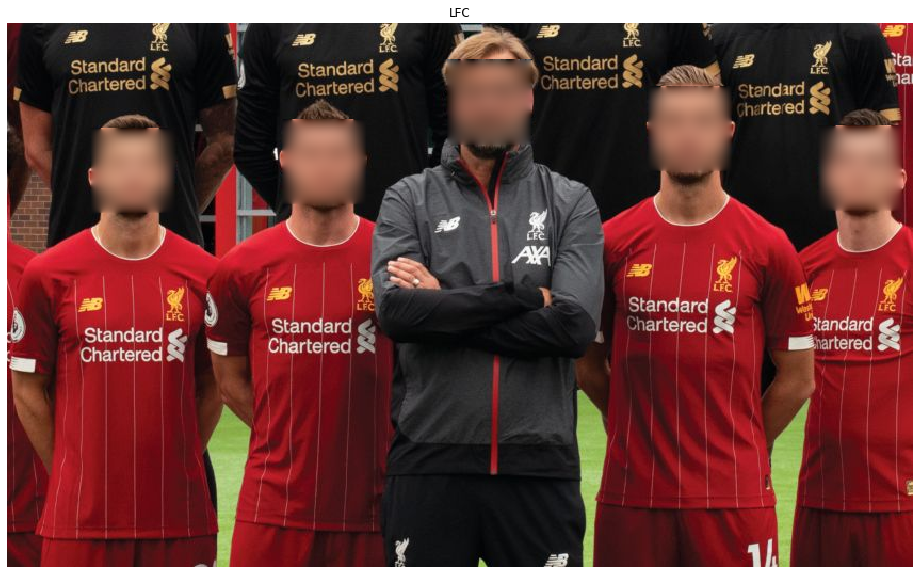

In [346]:
detectFace(LFC, "LFC")